# **Logistic Regression**: HR Dataset 🕵️‍♀️

This is the dataset of a large company, which has around 4000 employees. Every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. This level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons:
* the former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
* a sizeable department has to be maintained, for the purposes of recruiting new talent
* more often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, it is important to understand what factors cause attrition. In other words, it is important to undersand what needs to be changed in order to get most of the employees to stay. Therefore, the goal of the study is to model the probability of attrition based on certain features.

# **Exploratory Data Analysis (EDA)**

$\qquad$ <span style="color:gray"><b>0.</b> Settings </span><br>
$\qquad$ <span style="color:gray"><b>1.</b> Dataset </span><br>
$\qquad$ <span style="color:gray"><b>2.</b> Data Preprocessing </span><br>
$\qquad$ <span style="color:gray"><b>3.</b> Exploratory Data Analysis (EDA) </span><br>

## **0.** Settings

In [1]:
# Libraries
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd  

%matplotlib inline

## **1.** Dataset

In [ ]:
'''
    DATASET INFORMATIONS

    |--------------------------|------------|-------------------------------------------------------------------------------|
    | Name                     | Data Type  | Description                                                                   |
    |--------------------------|------------|-------------------------------------------------------------------------------|
    | Age                      | continuous | Age of the employee                                                           |
    | Attrition                | nominal    | Whether the employee left in the previous year or not                         |
    | BusinessTravel           | nominal    | How frequently the employees travelled for business purposes in the last year |
    | Department               | nominal    | Department in company                                                         |
    | DistanceFromHome         | continuous | Distance from home in kms                                                     |
    | Education                | continuous | Education Level                                                               |
    | EducationField           | nominal    | Field of education                                                            |
    | EmployeeCount            | continuous | Employee count                                                                |
    | EmployeeID               | nominal    | Employee number/id                                                            |
    | Gender                   | nominal    | Gender of employee                                                            |
    | JobLevel                 | continuous | Job level at company on a scale of 1 to 5                                     |
    | JobRole                  | nominal    | Name of job role in company                                                   |
    | MaritalStatus            | nominal    | Marital status of the employee                                                |
    | MonthlyIncome            | continuous | Monthly income in rupees per month                                            |
    | NumCompaniesWorked       | continuous | Total number of companies the employee has worked for                         |
    | Over18                   | nominal    | Whether the employee is above 18 years of age or not                          |
    | PercentSalaryHike        | continuous | Percent salary hike for last year                                             |
    | PerformanceRating	       | continuous | Performance rating for last year                                              |
    | RelationshipSatisfaction | continuous | Relationship satisfaction level                                               |
    | StandardHours            | continuous | Standard hours of work for the employee                                       |
    | StockOptionLevel         | continuous | Stock option level of the employee                                            |
    | TotalWorkingYears        | continuous | Total number of years the employee has worked so far                          |
    | TrainingTimesLastYear    | continuous | Number of times training was conducted for this employee last year            |
    | WorkLifeBalance          | continuous | Work life balance level                                                       |
    | YearsAtCompany           | continuous | Total number of years spent at the company by the employee                    |
    | YearsSinceLastPromotion  | continuous | Number of years since last promotion                                          |
    | YearsWithCurrManager     | continuous | Number of years under current manager                                         |
    |--------------------------|------------|-------------------------------------------------------------------------------|

'''

In [2]:
# Import the dataset
data = pd.read_csv('./dataset.csv')
data.head().T

,0,1,2,3,4
Age,51,31,32,38,32
Attrition,No,Yes,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Frequently,Non-Travel,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,6,10,17,2,10
Education,2,1,4,5,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeID,1,2,3,4,5
Gender,Female,Female,Male,Male,Male


In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

## **2.** Data Preprocessing

In [5]:
# Null elements
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
data.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
EmployeeID                 False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
dtype: bool

In [7]:
data.shape

(4410, 24)

In [8]:
# We can either fill the nulls with 0 or delete the rows. 
# In this case we can try to delete the rows with missing 
# elements since we have quite a lot of data.

# Fill
# data.fillna(0, inplace =True)

# Drop
data = data.dropna(how='any', axis=0)
data.shape

(4382, 24)

In [9]:
# We remove unnecessary information
data.drop(['EmployeeCount','EmployeeID','StandardHours', 'Over18'], axis=1, inplace=True)

#   * 'EmployeeCount' is always equal to 1 (as employees are interviewed one at a time)
#   * 'EmployeeID' are unique values 
#   * 'StandardHours' is (basically) always 8
#   * 'Over18' because all the employees are >18

data.shape

(4382, 20)

## **3.** Exploratory Data Analysis (EDA)

705
3677
The percentage of employee that left in the previous year is:  16.08854404381561 %
The percentage of employee that did not leave in the previous year is:  83.91145595618438 %


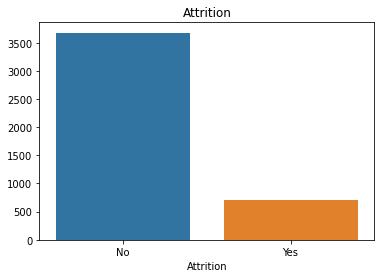

In [10]:
# How many employee left in the previous year?
print(len(data[data['Attrition']=='Yes']))
print(len(data[data['Attrition']=='No']))

print('The percentage of employee that left in the previous year is: ',
      (len(data[data['Attrition']=='Yes'])/len(data))*100, '%')
print('The percentage of employee that did not leave in the previous year is: ',
      (len(data[data['Attrition']=='No'])/len(data))*100, '%')

sns.countplot(x = "Attrition", data=data)
plt.title('Attrition')
plt.ylabel(None)
plt.show()

In [11]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
len(data.columns)

20

In [12]:
## For visualization purposes, let's define a function 
## to plot categorical variables based on a particular
## hue and to print the percentage.

def countplot_with_perc(x, data, hue):
    
    # Define the plot
    ax         = sns.countplot(x=x, data=data, hue=hue);
    bars       = ax.patches
    half       = int(len(bars)/2)
    left_bars  = bars[:half]
    right_bars = bars[half:]

    # Add the percentage
    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total    = height_l + height_r
        ax.text(left.get_x() + left.get_width()/2.,
            height_l + 40, '{0:.0%}'.format(height_l/total), ha='center');
        ax.text(right.get_x() + right.get_width()/2.,
            height_r + 40, '{0:.0%}'.format(height_r/total), ha='center');


## Define a customized histplot for continuous variables.

def histplot_continuous(x, data, hue):
    sns.histplot(data=data, x=x, hue=hue,
        kde=True, bins=15, palette='tab10', multiple='stack', line_kws={'lw': 5});


Overview of 4 variables at the time.

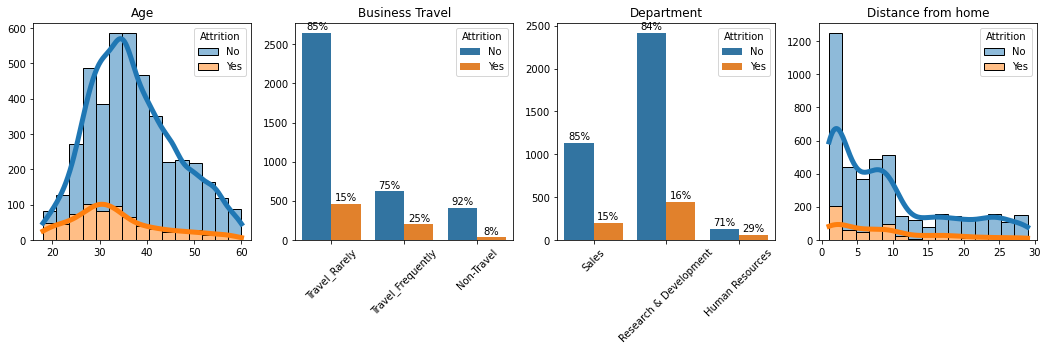

In [15]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
histplot_continuous(x='Age', data=data, hue=hue);
plt.title('Age')
plt.ylabel(None)
plt.xlabel(None)

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='BusinessTravel', data=data, hue=hue);
plt.title('Business Travel')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
countplot_with_perc(x='Department', data=data, hue=hue);
plt.title('Department')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)
histplot_continuous(x='DistanceFromHome', data=data, hue=hue);
plt.title('Distance from home')
plt.ylabel(None);
plt.xlabel(None);

**Insights**

* 'Business Travel' seems to have an influence on the attrition: the percentage of employees who left increases when the frequency with which they traveled 
* Also 'Department' could have an influence: the highest percentage of people who have left the company is in 'Human Resources'
* Instead, 'Distance from home' and 'Age' do not have particularly different trends for the two categories of people, so they do not seem to be very relevant features

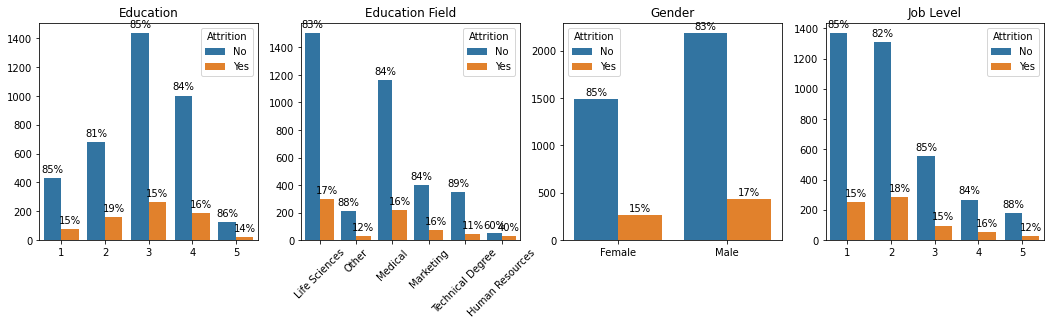

In [16]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='Education', data=data, hue=hue);
plt.title('Education')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='EducationField', data=data, hue=hue);
plt.title('Education Field')
plt.xticks(rotation=45);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
countplot_with_perc(x='Gender', data=data, hue=hue);
plt.title('Gender')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)       
countplot_with_perc(x='JobLevel', data=data, hue=hue);            
plt.title('Job Level')
plt.ylabel(None);
plt.xlabel(None);

**Insights**

* The education level, as well as the gender and the job level, does not seem to be particularly relevant, the percentages are fairly homogeneous
* Instead, the education field could have an impact (this could be related to the 'Department')

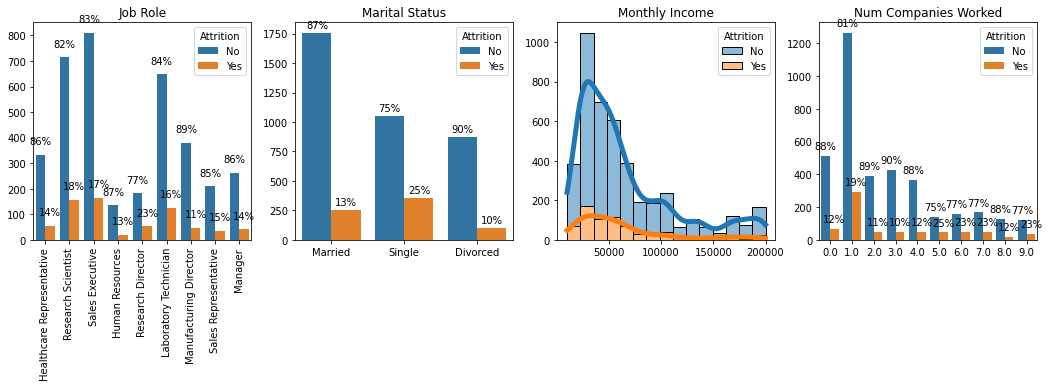

In [17]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='JobRole', data=data, hue=hue);            
plt.title('Job Role')
plt.xticks(rotation=90);
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='MaritalStatus', data=data, hue=hue);
plt.title('Marital Status')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
histplot_continuous(x='MonthlyIncome', data=data, hue=hue);
plt.title('Monthly Income')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)
countplot_with_perc(x='NumCompaniesWorked', data=data, hue=hue);            
plt.title('Num Companies Worked')
plt.ylabel(None);
plt.xlabel(None);


**Insights**

* The job role and the number of companies the employeed worked for do not seem to have a strong impact on the attrition 
* The marital status, instead, is quite relevant: the highest percentage of employees who left (among the three groups) were single
* Also the income does not seem to be of particular relevance: obviously as salary increases the number of people leaving the company decreases, but in general also the number of employees

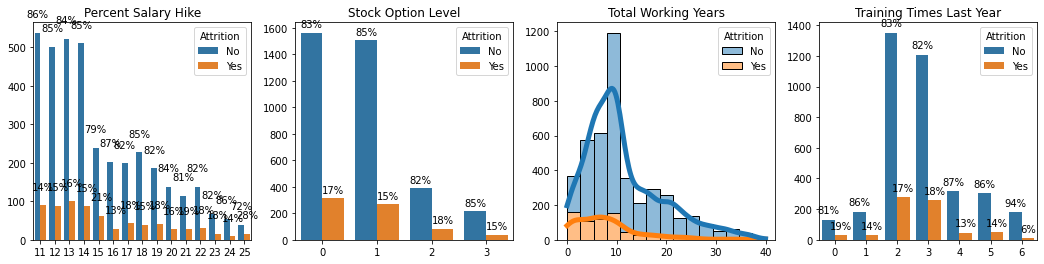

In [18]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
countplot_with_perc(x='PercentSalaryHike', data=data, hue=hue);
plt.title('Percent Salary Hike')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
countplot_with_perc(x='StockOptionLevel', data=data, hue=hue);            
plt.title('Stock Option Level')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
histplot_continuous(x='TotalWorkingYears', data=data, hue=hue);
plt.title('Total Working Years')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 4)
countplot_with_perc(x='TrainingTimesLastYear', data=data, hue=hue);
plt.title('Training Times Last Year')
plt.ylabel(None);
plt.xlabel(None);

**Insights**

* Of all the variables, none in particular is shown to be relevant (perhaps, slightly, 'Training Times Last Year')

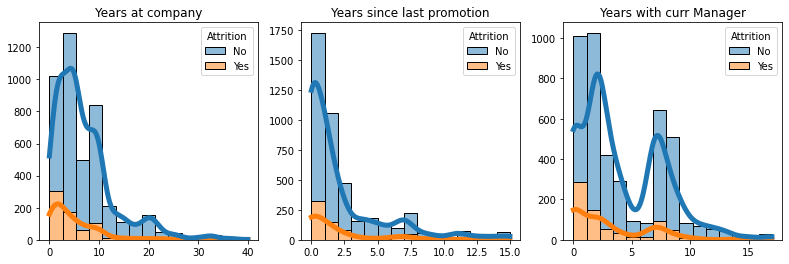

In [19]:
plt.figure(figsize=(18, 4))

n_row = 1
n_col = 4
hue   = 'Attrition'

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 1)
histplot_continuous(x='YearsAtCompany', data=data, hue=hue);
plt.title('Years at company')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 2)
histplot_continuous(x='YearsSinceLastPromotion', data=data, hue=hue);
plt.title('Years since last promotion')
plt.ylabel(None);
plt.xlabel(None);

#------------------------------------------------------------------------------------------
plt.subplot(n_row, n_col, 3)
histplot_continuous(x='YearsWithCurrManager', data=data, hue=hue);
plt.title('Years with curr Manager')
plt.ylabel(None);
plt.xlabel(None);

**Insights**

* Also in this case, of all the variables, none in particular is shown to be relevant